In [28]:
import pandas as pd
import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

basket_ref = pd.read_excel("pergame.xlsx")
basket_ref_adv = pd.read_excel("nba-ref.xlsx")
basket_ctg = pd.read_csv("players_offensive_overview_12_18_2023.csv")
basket_ref_adv
nba_ref = pd.merge(basket_ref,basket_ref_adv,on=['Player','Pos',"Age","Tm",'G'],how='inner')
#nba_ref['Player'] = nba_ref['Player'].apply(lambda x: unidecode.unidecode(x))
nba_ref = nba_ref.drop(columns=['Unnamed: 24','Player-additional_x','Player-additional_y','Unnamed: 19','Rk_x','Rk_y'])
#nba_ref = pd.merge(nba_ref,basket_ctg,on='Player',how='outer')
nba_ref.fillna(0,inplace=True)
print(nba_ref.columns)
nba_ref


Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP_x', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'MP_y',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP'],
      dtype='object')


,Player,Pos,Age,Tm,G,GS,MP_x,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,C,24,TOR,19,0,18.1,3.2,6.9,0.462,...,15.1,21.1,0.1,0.4,0.5,0.070,-1.2,0.5,-0.7,0.1
1,Bam Adebayo,C,26,MIA,16,16,33.6,8.3,15.8,0.522,...,11.4,28.0,0.9,0.8,1.7,0.151,1.5,1.3,2.8,0.7
2,Ochai Agbaji,SG,23,UTA,26,10,21.2,2.5,5.7,0.436,...,10.6,12.8,0.3,0.2,0.5,0.041,-2.0,-0.7,-2.7,-0.1
3,Santi Aldama,PF,23,MEM,18,5,25.9,4.8,10.8,0.443,...,9.2,20.9,0.1,0.6,0.7,0.075,0.2,0.1,0.3,0.3
4,Nickeil Alexander-Walker,SG,25,MIN,24,11,23.8,2.6,6.4,0.412,...,14.9,14.3,0.0,1.0,1.0,0.085,-2.2,2.0,-0.2,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Thaddeus Young,PF,35,TOR,4,0,3.3,0.5,1.0,0.500,...,17.0,19.2,0.0,0.0,0.0,-0.041,-1.1,-0.6,-1.8,0.0
514,Trae Young,PG,25,ATL,23,23,35.9,8.7,20.4,0.428,...,14.8,32.1,2.3,0.1,2.4,0.142,6.3,-2.2,4.1,1.3
515,Omer Yurtseven,C,25,UTA,18,6,12.6,1.9,3.8,0.515,...,21.0,16.5,0.0,0.2,0.2,0.039,-3.7,-0.9,-4.6,-0.2
516,Cody Zeller,C,31,NOP,21,0,9.9,0.6,1.7,0.333,...,13.1,10.9,0.1,0.2,0.3,0.069,-4.2,-0.1,-4.3,-0.1


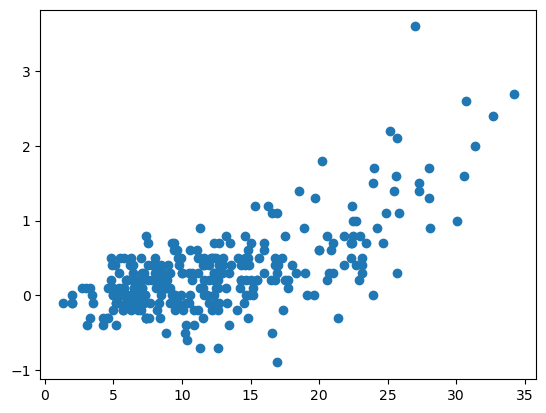

[[1.         0.67273965]
 [0.67273965 1.        ]]


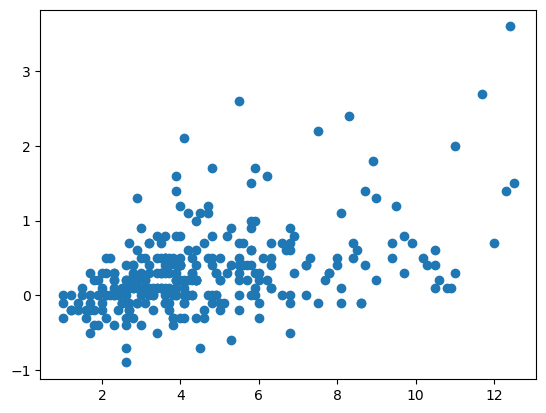

[[1.         0.45632979]
 [0.45632979 1.        ]]


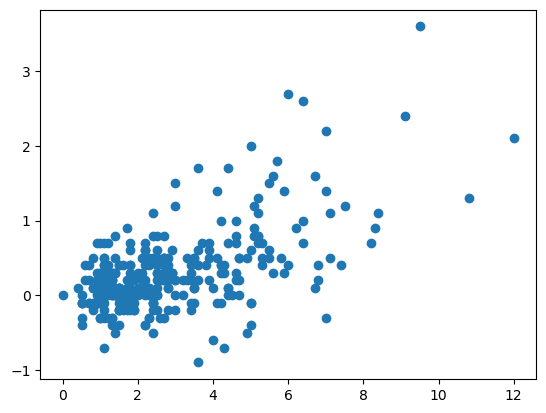

[[1.         0.58378401]
 [0.58378401 1.        ]]


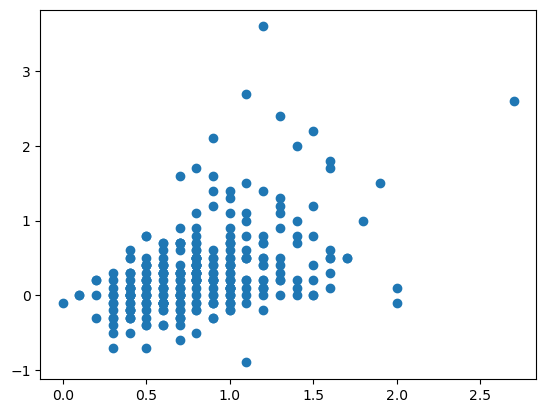

[[1.         0.45079199]
 [0.45079199 1.        ]]


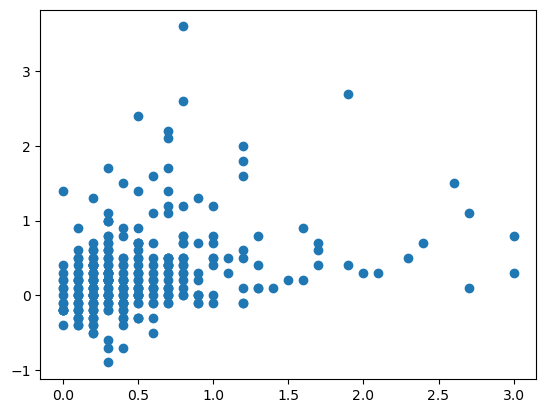

[[1.         0.29918531]
 [0.29918531 1.        ]]


In [56]:
nba_ref_players = nba_ref[nba_ref['MP_x']>15]
plt.scatter(x=nba_ref_players['PTS'],y=nba_ref_players['VORP'])
plt.show()
print(np.corrcoef(x=nba_ref_players['PTS'],y=nba_ref_players['VORP']))
plt.scatter(x=nba_ref_players['TRB'],y=nba_ref_players['VORP'])
plt.show()
print(np.corrcoef(x=nba_ref_players['TRB'],y=nba_ref_players['VORP']))
plt.scatter(x=nba_ref_players['AST'],y=nba_ref_players['VORP'])
plt.show()
print(np.corrcoef(x=nba_ref_players['AST'],y=nba_ref_players['VORP']))
plt.scatter(x=nba_ref_players['STL'],y=nba_ref_players['VORP'])
plt.show()
print(np.corrcoef(x=nba_ref_players['STL'],y=nba_ref_players['VORP']))
plt.scatter(x=nba_ref_players['BLK'],y=nba_ref_players['VORP'])
plt.show()
print(np.corrcoef(x=nba_ref_players['BLK'],y=nba_ref_players['VORP']))


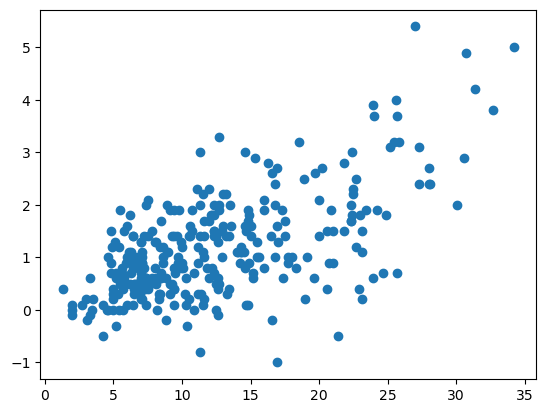

[[1.         0.62248765]
 [0.62248765 1.        ]]


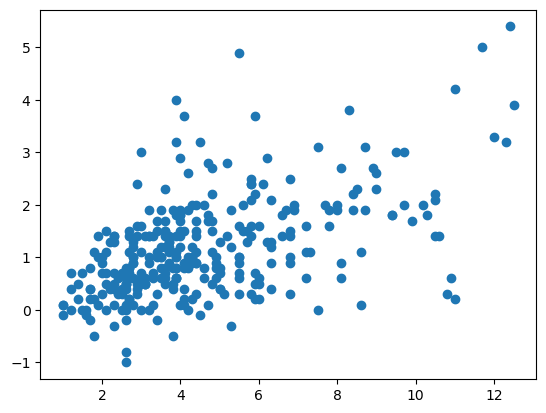

[[1.         0.53220425]
 [0.53220425 1.        ]]


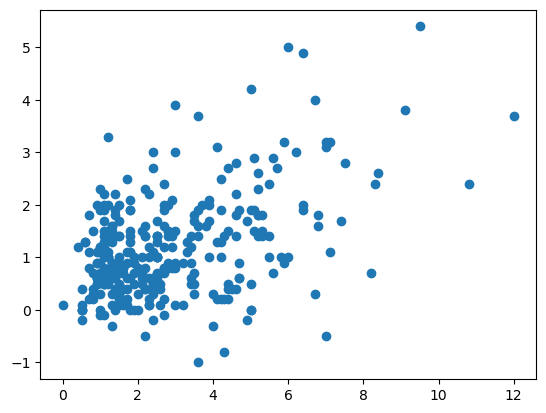

[[1.         0.45381276]
 [0.45381276 1.        ]]


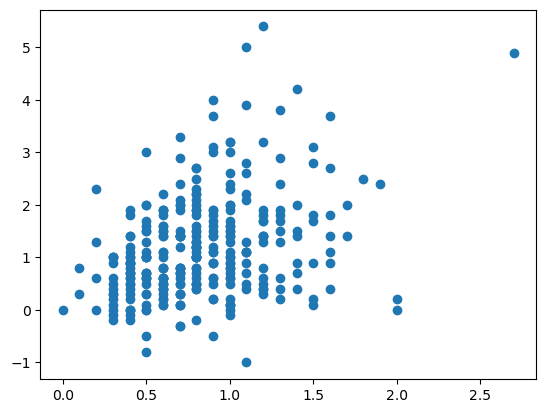

[[1.         0.35235648]
 [0.35235648 1.        ]]


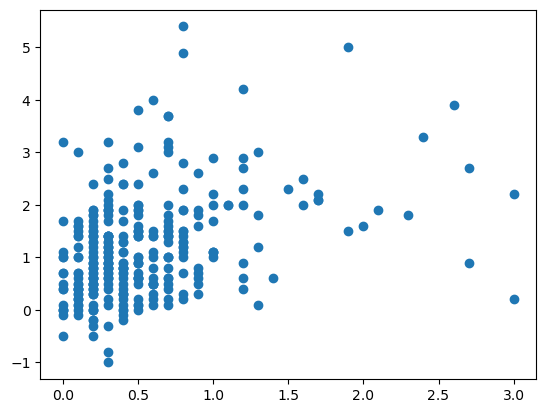

[[1.         0.37631453]
 [0.37631453 1.        ]]


In [35]:
plt.scatter(x=nba_ref_players['PTS'],y=nba_ref_players['WS'])
plt.show()
print(np.corrcoef(x=nba_ref_players['PTS'],y=nba_ref_players['WS']))
plt.scatter(x=nba_ref_players['TRB'],y=nba_ref_players['WS'])
plt.show()
print(np.corrcoef(x=nba_ref_players['TRB'],y=nba_ref_players['WS']))
plt.scatter(x=nba_ref_players['AST'],y=nba_ref_players['WS'])
plt.show()
print(np.corrcoef(x=nba_ref_players['AST'],y=nba_ref_players['WS']))
plt.scatter(x=nba_ref_players['STL'],y=nba_ref_players['WS'])
plt.show()
print(np.corrcoef(x=nba_ref_players['STL'],y=nba_ref_players['WS']))
plt.scatter(x=nba_ref_players['BLK'],y=nba_ref_players['WS'])
plt.show()
print(np.corrcoef(x=nba_ref_players['BLK'],y=nba_ref_players['WS']))

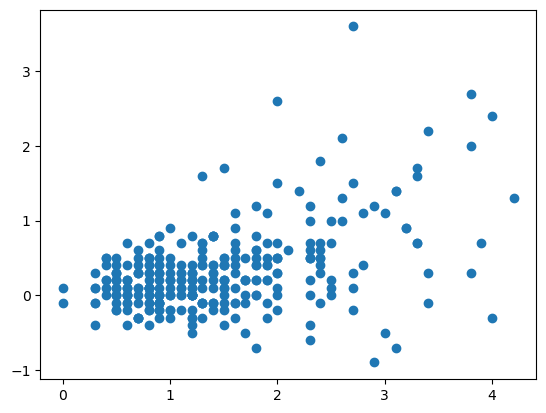

[[1.         0.45614252]
 [0.45614252 1.        ]]


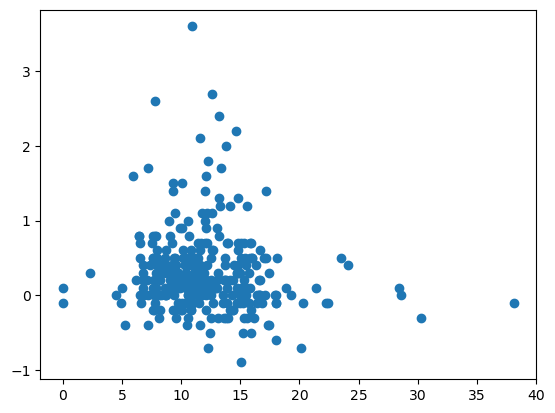

[[ 1.         -0.10957245]
 [-0.10957245  1.        ]]


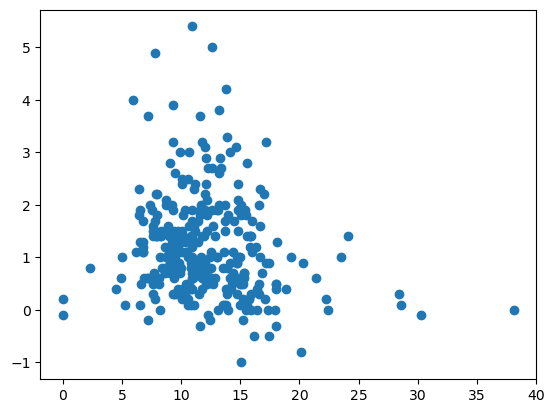

[[ 1.         -0.16800129]
 [-0.16800129  1.        ]]


In [58]:
plt.scatter(x=nba_ref_players['TOV'],y=nba_ref_players['VORP'])
plt.show()
print(np.corrcoef(x=nba_ref_players['TOV'],y=nba_ref_players['VORP']))
plt.scatter(x=nba_ref_players['TOV%'],y=nba_ref_players['VORP'])
plt.show()
print(np.corrcoef(x=nba_ref_players['TOV%'],y=nba_ref_players['VORP']))
plt.scatter(x=nba_ref_players['TOV%'],y=nba_ref_players['WS'])
plt.show()
print(np.corrcoef(x=nba_ref_players['TOV%'],y=nba_ref_players['WS']))

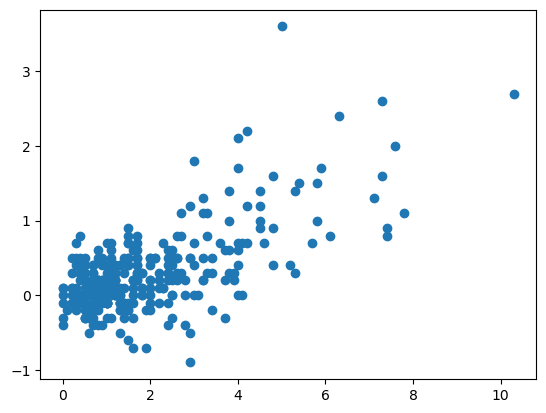

[[1.         0.65612232]
 [0.65612232 1.        ]]


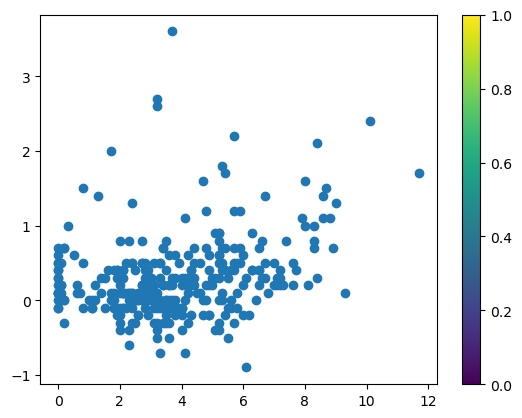

[[1.         0.29376093]
 [0.29376093 1.        ]]


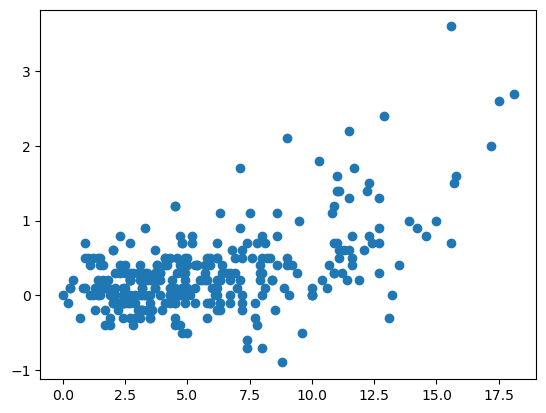

[[1.         0.55283913]
 [0.55283913 1.        ]]


In [52]:
plt.scatter(x=nba_ref_players['FT'],y=nba_ref_players['VORP'])
plt.show()
print(np.corrcoef(x=nba_ref_players['FT'],y=nba_ref_players['VORP']))
plt.scatter(x=nba_ref_players['3PA'],y=nba_ref_players['VORP'])
plt.colorbar()
plt.show()
print(np.corrcoef(x=nba_ref_players['3PA'],y=nba_ref_players['VORP']))
plt.scatter(x=nba_ref_players['2PA'],y=nba_ref_players['VORP'])
plt.show()
print(np.corrcoef(x=nba_ref_players['2PA'],y=nba_ref_players['VORP']))


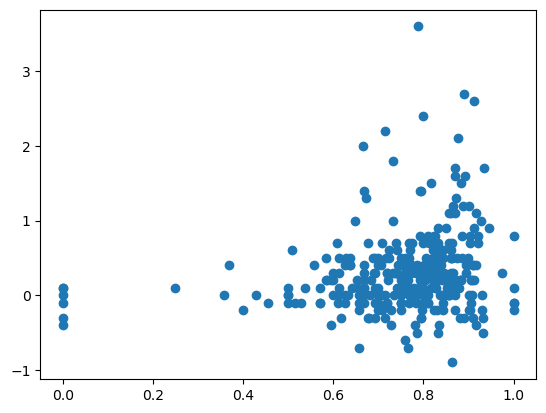

[[1.         0.20203174]
 [0.20203174 1.        ]]


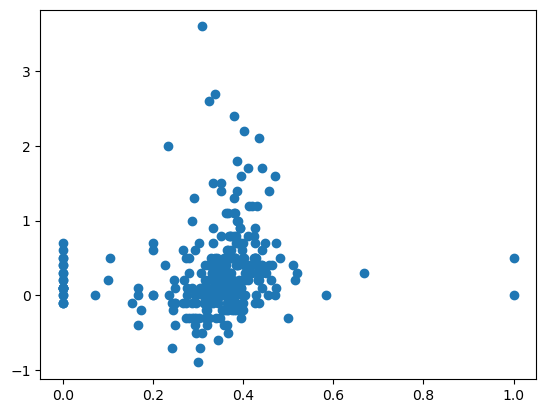

[[1.         0.13645896]
 [0.13645896 1.        ]]


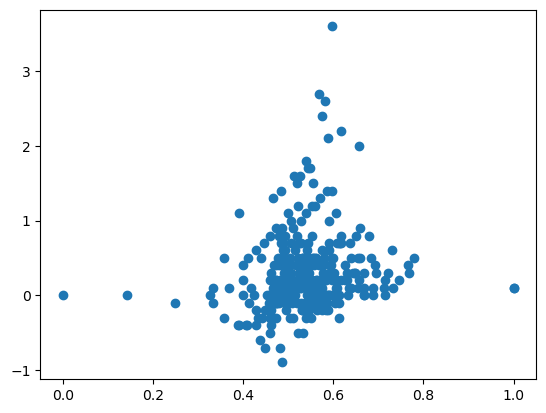

[[1.         0.17174426]
 [0.17174426 1.        ]]


In [47]:
plt.scatter(x=nba_ref_players['FT%'],y=nba_ref_players['VORP'])
plt.show()
print(np.corrcoef(x=nba_ref_players['FT%'],y=nba_ref_players['VORP']))
plt.scatter(x=nba_ref_players['3P%'],y=nba_ref_players['VORP'])
plt.show()
print(np.corrcoef(x=nba_ref_players['3P%'],y=nba_ref_players['VORP']))
plt.scatter(x=nba_ref_players['2P%'],y=nba_ref_players['VORP'])
plt.show()
print(np.corrcoef(x=nba_ref_players['2P%'],y=nba_ref_players['VORP']))

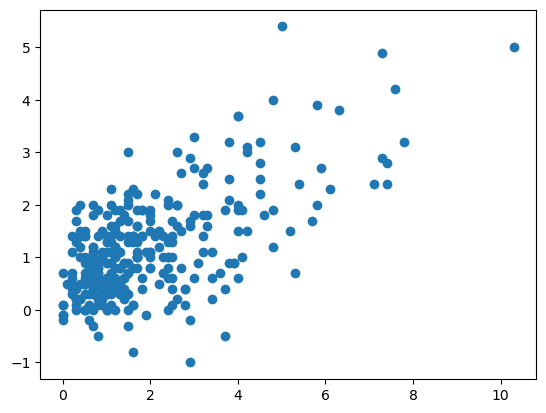

[[1.         0.63332232]
 [0.63332232 1.        ]]


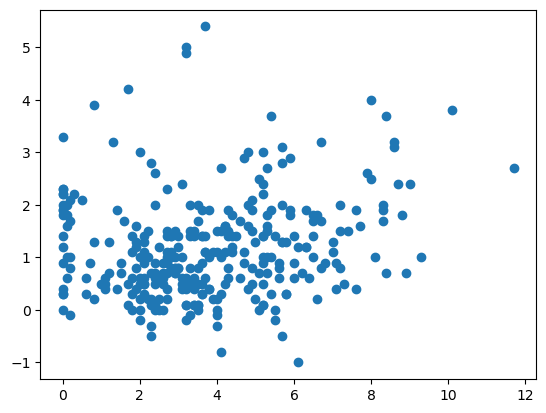

[[1.         0.18525578]
 [0.18525578 1.        ]]


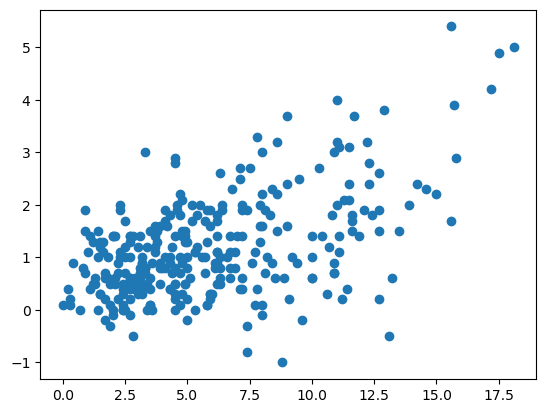

[[1.         0.52708695]
 [0.52708695 1.        ]]


In [45]:
plt.scatter(x=nba_ref_players['FT'],y=nba_ref_players['WS'])
plt.show()
print(np.corrcoef(x=nba_ref_players['FT'],y=nba_ref_players['WS']))
plt.scatter(x=nba_ref_players['3PA'],y=nba_ref_players['WS'])
plt.show()
print(np.corrcoef(x=nba_ref_players['3PA'],y=nba_ref_players['WS']))
plt.scatter(x=nba_ref_players['2PA'],y=nba_ref_players['WS'])
plt.show()
print(np.corrcoef(x=nba_ref_players['2PA'],y=nba_ref_players['WS']))